# Analyzing Historical Stock/Revenue Data and Building a Dashboard

## 1. Extracting Tesla Stock Data Using yfinance

In [ ]:
! pip install yfinance --upgrade --no-cache-dir

In [111]:
import yfinance as yf
import pandas as pd

tesla = yf.Ticker('TSLA')
tesla_hist = tesla.history(period = 'max')
df = pd.DataFrame(tesla_hist)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## 2. Extracting Tesla Revenue Data Using Webscraping

* ### We see that the it is successfully imported due to response 200.


In [141]:
from bs4 import BeautifulSoup 
import requests 
import pandas as pd

url = "https://en.wiktionary.org/wiki/euh"
html = requests.get(url)
print(html)

<Response [200]>


* ### Error 404 (error), 403 means not allowed 

In [142]:
url = "https://finance.yahoo.com/quote/TSLA/financials?p=TSLA"
html = requests.get(url)
print(html)

<Response [404]>


* ### No error now, ask GPT why

In [143]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
html = requests.get("https://finance.yahoo.com/quote/TSLA/financials?p=TSLA", headers=headers)

print(html)

<Response [200]>


* ### Prettify and import whole html into beautiful soup

In [144]:
soup = BeautifulSoup(html.text,"html.parser") 
#print(soup.prettify())

* ### Find the table

In [145]:
table = soup.find("div", class_ = "M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)")
#print(table.prettify())

* ### Find headers : you can't do a find all of a find all, but a find all of a find ! 

In [146]:
header_html = table.find("div", class_ = "D(tbr) C($primaryColor)") #header bar HTML

headers = header_html.find_all("span") #within the header bar HTML, find the line with the text and make a list of the HTML
print(headers)


[<span>Breakdown</span>, <span>ttm</span>, <span>12/31/2022</span>, <span>12/31/2021</span>, <span>12/31/2020</span>]


In [147]:
titles = []

for i in headers: #convert each HTML of the element of the list into text
    title = i.text
    titles.append(title)
print(titles)

['Breakdown', 'ttm', '12/31/2022', '12/31/2021', '12/31/2020']


* ### Assign the headers as the headers of our dataframe df

In [148]:
import pandas as pd

df = pd.DataFrame(columns = titles)
df


,Breakdown,ttm,12/31/2022,12/31/2021,12/31/2020


In [149]:
# do a loop that finds all the tables rows (usually "tr")
values_html = table.find("div", class_ = "D(tbrg)")
rows = values_html.find_all("div", class_ = "D(tbr) fi-row Bgc($hoverBgColor):h")

data_txt = []

for i in rows[1:10]:                                  #you have to do it up to 10 as otherwise 'row' 11 isnt same length as out dataframe df
    #print(i.text)                                     # I get here all the text and numbers from all the rows. 
    data = i.find_all("span")                          #not doing a find all of find all (error), because we take i. 
    #print(data)
    row = [tr.text for tr in data]
    print(row)
    
                                                        
    l = len(df)                                         #assign row numbers to df
    df.loc[l] = row
                                  

df


#elements_rows_html = table_html.find_all("div", class_ = "D(tbc) Ta(start) Pend(15px)--mv2 Pend(10px) Bxz(bb) Py(8px) Bdends(s) Bdbs(s) Bdstarts(s) Bdstartw(1px) Bdbw(1px) Bdendw(1px) Bdc($seperatorColor) Pos(st) Start(0) Bgc($lv2BgColor) fi-row:h_Bgc($hoverBgColor) Pstart(15px)--mv2 Pstart(10px)")
#print(len(elements_rows_html))


['Cost of Revenue', '76,925,000', '60,609,000', '40,217,000', '24,906,000']
['Gross Profit', '18,999,000', '20,853,000', '13,606,000', '6,630,000']
['Operating Expense', '8,237,000', '7,021,000', '7,110,000', '4,636,000']
['Operating Income', '10,762,000', '13,832,000', '6,496,000', '1,994,000']
['Net Non Operating Interest Income Expense', '762,000', '106,000', '-315,000', '-718,000']
['Other Income Expense', '241,000', '-219,000', '162,000', '-122,000']
['Pretax Income', '11,765,000', '13,719,000', '6,343,000', '1,154,000']
['Tax Provision', '1,027,000', '1,132,000', '699,000', '292,000']
['Net Income Common Stockholders', '10,794,000', '12,583,000', '5,524,000', '721,000']


,Breakdown,ttm,12/31/2022,12/31/2021,12/31/2020
0,Cost of Revenue,"76,925,000","60,609,000","40,217,000","24,906,000"
1,Gross Profit,"18,999,000","20,853,000","13,606,000","6,630,000"
2,Operating Expense,"8,237,000","7,021,000","7,110,000","4,636,000"
3,Operating Income,"10,762,000","13,832,000","6,496,000","1,994,000"
4,Net Non Operating Interest Income Expense,"762,000","106,000","-315,000","-718,000"
5,Other Income Expense,"241,000","-219,000","162,000","-122,000"
6,Pretax Income,"11,765,000","13,719,000","6,343,000","1,154,000"
7,Tax Provision,"1,027,000","1,132,000","699,000","292,000"
8,Net Income Common Stockholders,"10,794,000","12,583,000","5,524,000","721,000"


* ### Let's extract tesla revenue

In [150]:
revenue = df.iloc[0,:]
revenue

Breakdown     Cost of Revenue
ttm                76,925,000
12/31/2022         60,609,000
12/31/2021         40,217,000
12/31/2020         24,906,000
Name: 0, dtype: object

### 3. Extracting GameStop Stock Data Using yfinance

In [ ]:
! pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
game_stp = yf.Ticker("GME")
game_stp.info

In [5]:
game_stp_stck = game_stp.history(period = 'max')
game_stp_stck

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-04 00:00:00-05:00,16.510000,16.750000,16.309999,16.360001,2671500,0.0,0.0
2024-01-05 00:00:00-05:00,16.160000,16.520000,15.960000,15.960000,2615700,0.0,0.0
2024-01-08 00:00:00-05:00,15.780000,16.120001,15.700000,15.790000,3031100,0.0,0.0


### 4. Extracting GameStop Revenue Data Using Webscraping 

In [134]:
import requests
from bs4 import BeautifulSoup

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
url = "https://finance.yahoo.com/quote/GME/financials?p=GME"
html = requests.get(url, headers=headers)
#print(html.text)                           #prints the whole website's HTML
html

<Response [200]>

* ### Let's just extract the revenue this time

In [135]:
soup = BeautifulSoup(html.text, 'lxml')
headers_row = soup.find("div", class_ = "D(tbr) C($primaryColor)")

headers_val = []

for i in headers_row:
    #print(i.text)
    headers_val.append(i.text)
    
import pandas as pd

df_3 = pd.DataFrame(columns = headers_val)
df_3

,Breakdown,ttm,1/31/2023,1/31/2022,1/31/2021,1/31/2020


* ### Merge revenue to df

In [136]:
revenue_row = soup.find("div", class_ = "D(tbr) fi-row Bgc($hoverBgColor):h") 
rev = []

for i in revenue_row:
    print(i.text) 
    rev.append(i.text)
    
l = len(df_3)                                         #assign row numbers to df
df_3.loc[l] = rev
df_3
    

Total Revenue
5,705,600
5,927,200
6,010,700
5,089,800
6,466,000


,Breakdown,ttm,1/31/2023,1/31/2022,1/31/2021,1/31/2020
0,Total Revenue,"5,705,600","5,927,200","6,010,700","5,089,800","6,466,000"


### 5. Tesla Stock and Revenue Dashboard

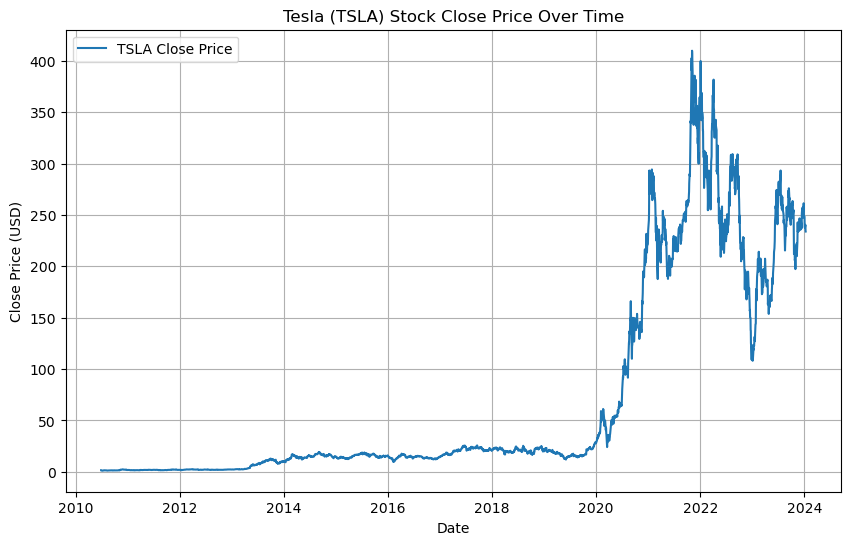

In [113]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='TSLA Close Price')
plt.title('Tesla (TSLA) Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

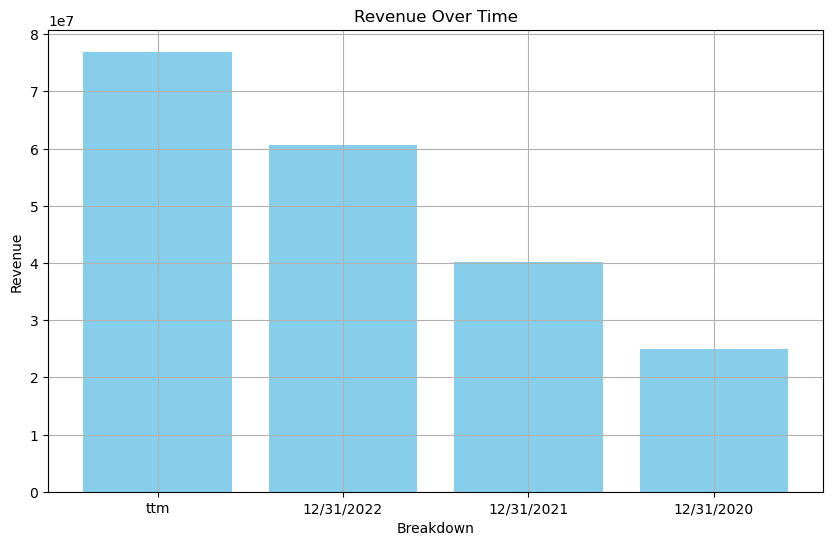

In [151]:

# Sample DataFrame
data = {'Breakdown': ['ttm', '12/31/2022', '12/31/2021', '12/31/2020'],
        'Revenue': ['76,925,000', '60,609,000', '40,217,000', '24,906,000']}

df = pd.DataFrame(data)
df['Revenue'] = pd.to_numeric(df['Revenue'].str.replace(',', ''))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Breakdown'], df['Revenue'], color='skyblue')
plt.title('Revenue Over Time')
plt.xlabel('Breakdown')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

### 6. GameStop Stock and Revenue Dashboard

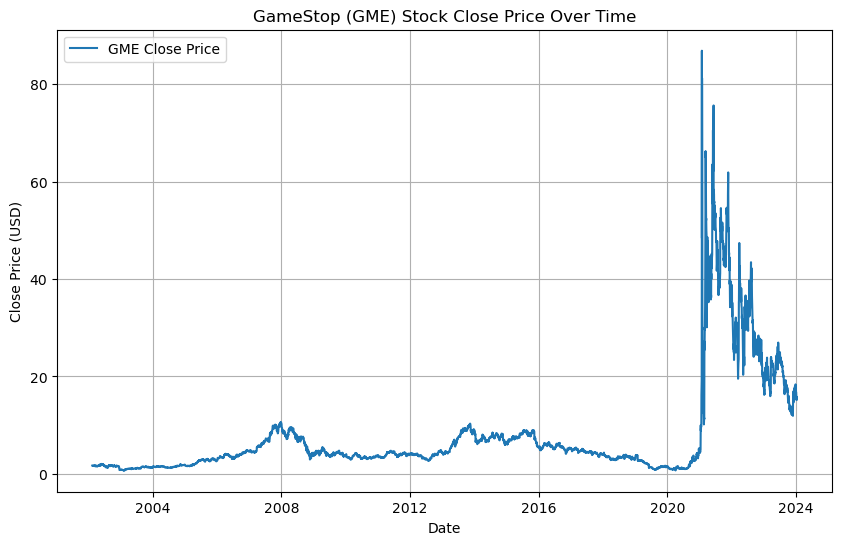

In [137]:
plt.figure(figsize=(10, 6))
plt.plot(game_stp_stck.index, game_stp_stck['Close'], label='GME Close Price')
plt.title('GameStop (GME) Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

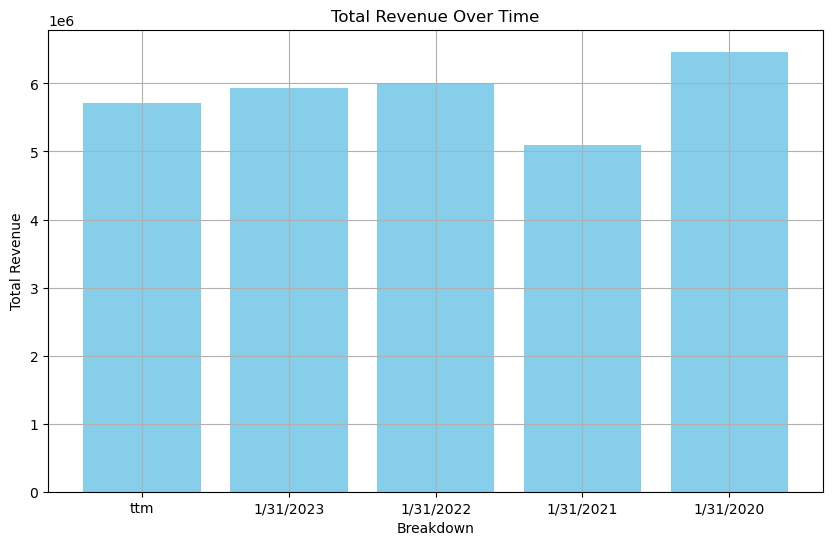

In [139]:
# Sample DataFrame
data = {'Breakdown': ['ttm', '1/31/2023', '1/31/2022', '1/31/2021', '1/31/2020'],
        'Total Revenue': ['5,705,600', '5,927,200', '6,010,700', '5,089,800', '6,466,000']}

df = pd.DataFrame(data)
df['Total Revenue'] = pd.to_numeric(df['Total Revenue'].str.replace(',', ''))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['Breakdown'], df['Total Revenue'], color='skyblue')
plt.title('Total Revenue Over Time')
plt.xlabel('Breakdown')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

### 7. Sharing your Assignment Notebook